In [ ]:
#Loading dataset


In [4]:
import math

from streamlit import title

import random
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

### Model #1
Written in pure python.

In [16]:
class LinearRegression():
    def __init__(self, params = 8):
        self.w = [random.random() for _ in range(params)]
        self.b = 0.0

    def predict(self, x):
        y_hat = []
        for i in x:
            y_hat.append( sum(x_i + w_i for x_i, w_i in zip(i, self.w)) + self.b)
        return y_hat

    def gradients(self, x, y):
        m = len(x)
        y_hat = self.predict(x)
        dj_dw = [0.0] * len(self.w)
        dj_db = 0.0

        for i in range(m):
            error = (y_hat[i] - y[i]) / m
            for j in range(len(self.w)):
                dj_dw[j] += (error * x[i][j])
            dj_db += (error)
        return dj_dw, dj_db

    def Losses(self, x, y):
        m = len(x)
        y_hat = self.predict(x)
        error = [Y_hat - y for Y_hat, y in zip(y_hat, y)]
        mae = sum(abs(er) for er in error) / m
        mse = sum(er**2 for er in error) / m
        rmse = math.sqrt(mse)
        return mae, mse, rmse

    def gradient_descent(self, x, y, alpha = 0.001):
        dj_dw, dj_db = self.gradients(x, y)
        self.w = [W - alpha*dw for W, dw in zip(self.w, dj_dw)]
        self.b -= alpha * dj_db
        return self.Losses(x, y)



In [43]:
def train(model, X, Y, epoch, lr):
    mse = []
    mae = []
    rmse = []
    for i in range(epoch):
        a, b, c = model.gradient_descent(X, Y, lr)
        mse.append(b)
        mae.append(a)
        rmse.append(c)
        print(f"Epoch:{i+1}\tMSE:{b:.4f}\tMAE:{a:.4f}\tRMSE:{c:.4f}")
    plt.figure(figsize=(12, 8))
    plt.plot(mse, label="Mean Squared Error", color="red")
    plt.plot(mae, label="Mean Absolute Error", color="blue")
    plt.plot(rmse, label="Root Mean Squared Error", color="green")
    plt.show()

Epoch:1	MSE:914.4671	MAE:29.6898	RMSE:30.2402
Epoch:2	MSE:911.5168	MAE:29.6574	RMSE:30.1913
Epoch:3	MSE:908.5948	MAE:29.6250	RMSE:30.1429
Epoch:4	MSE:905.7007	MAE:29.5928	RMSE:30.0949
Epoch:5	MSE:902.8343	MAE:29.5606	RMSE:30.0472
Epoch:6	MSE:899.9955	MAE:29.5286	RMSE:29.9999
Epoch:7	MSE:897.1841	MAE:29.4967	RMSE:29.9530
Epoch:8	MSE:894.3998	MAE:29.4648	RMSE:29.9065
Epoch:9	MSE:891.6424	MAE:29.4331	RMSE:29.8604
Epoch:10	MSE:888.9118	MAE:29.4015	RMSE:29.8146
Epoch:11	MSE:886.2077	MAE:29.3699	RMSE:29.7692
Epoch:12	MSE:883.5299	MAE:29.3385	RMSE:29.7242
Epoch:13	MSE:880.8783	MAE:29.3071	RMSE:29.6796
Epoch:14	MSE:878.2527	MAE:29.2759	RMSE:29.6353
Epoch:15	MSE:875.6528	MAE:29.2448	RMSE:29.5914
Epoch:16	MSE:873.0785	MAE:29.2137	RMSE:29.5479
Epoch:17	MSE:870.5295	MAE:29.1828	RMSE:29.5047
Epoch:18	MSE:868.0058	MAE:29.1519	RMSE:29.4619
Epoch:19	MSE:865.5071	MAE:29.1212	RMSE:29.4195
Epoch:20	MSE:863.0332	MAE:29.0905	RMSE:29.3774
Epoch:21	MSE:860.5839	MAE:29.0600	RMSE:29.3357
Epoch:22	MSE:858.1591	

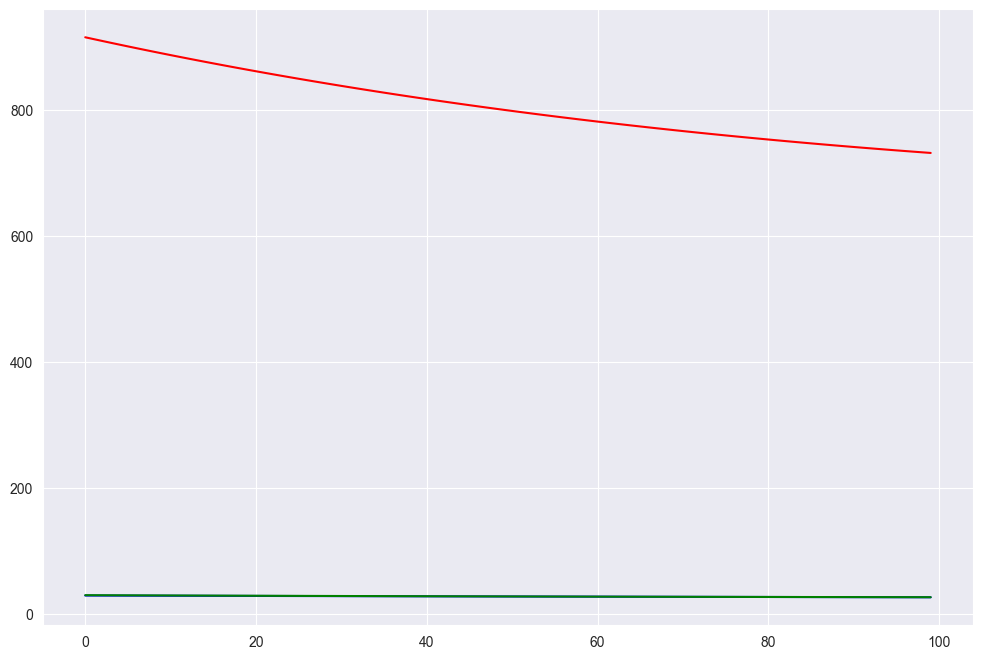

In [44]:
X = [
    [1.2, 2.3, 3.4, 4.5, 5.6, 6.7, 7.8, 8.9],
    [9.1, 8.2, 7.3, 6.4, 5.5, 4.6, 3.7, 2.8],
    [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8]
]
Y = [10.0, 20.0, 30.0]
Regressor = LinearRegression()
train(Regressor, X, Y, 100, 0.0001)

### Model 2
Using Numpy


In [ ]:
class LinearRegression_np():
    def __init__(self, params = 8):
        self.w = np.random.randn()
        self.b = np.random.randn()    #ts is useful for deep learning Imma try to use it here les see

    def predict(self, X):
        y_hat = np.dot(X, self.w) + self.b
        return y_hat

    def gradients(self, X, y):
        m = X.shape[0]
        y_hat = self.predict(X)
        error = y_hat - y
        dj_dw = (1/m) * X.T @ error
        dj_db = (1/m) * np.sum(error)

        return dj_dw, dj_db

    def losses(self, X, y):
        y_hat = self.predict(X)
        error = y_hat - y
        mae = np.mean(np.abs(error))
        mse = np.mean(np.square(error))
        rmse = np.sqrt(mse)

        return mae, mse, rmse

    def gradient_descent(self, X, y, alpha = 0.001):
        dj_dw, dj_db = self.gradients(X, y)
        self.w -= alpha * dj_db
        self.b -= alpha * dj_dw

        return self.losses(X, y)

In [40]:
def train_np(model, X, Y, epoch, lr):
    mse = []
    mae = []
    rmse = []

    for i in range(epoch):
        a, b, c = model.gradient_descent(X, Y, lr)
        mae.append(b)
        mse.append(a)
        rmse.append(c)

    plt.figure(figsize=(12, 8))
    plt.plot(mse, label="Mean Squared Error", color="red")
    plt.plot(mae, label="Mean Absolute Error", color="blue")
    plt.plot(rmse, label="Root Mean Squared Error", color="green")
    plt.show()

### Model 3
Using Sklearn


In [ ]:
import sklearn